In [2]:
words = open('names.txt', 'r').read().splitlines()
# Read gives you a continuous string from the read file while split lines gives you a list where elements are separated by \n! 
# Documentation: https://www.w3schools.com/python/python_strings_methods.asp

In [3]:
words[:4]

['emma', 'olivia', 'ava', 'isabella']

In [4]:
from PIL import Image
type(words)
# img = Image.open('types.png')
# img.show() #image opening, moving on...

list

In [5]:
b = {}
for w in words:
    wrd = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(wrd,wrd[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1     

In [6]:
fruit = {'apple': 5, 'pear': 2, 'kiwi': 12}
fruit['bannana'] = fruit.get('bannana', 0) + 1 # Get just gets the value from the key, the 0 basically says that if there exists no value, then set it to be equal to 0
print(fruit)
fruit['bannana'] = fruit.get('bannana', 0) + 1
fruit

{'apple': 5, 'pear': 2, 'kiwi': 12, 'bannana': 1}


{'apple': 5, 'pear': 2, 'kiwi': 12, 'bannana': 2}

In [7]:
# b.items() #returns a tupple of key, value pairs
#sorted does so based on the first thing in the tupple, so it would sort by the keys, but we want to sort by values so then we use sorted(x, key=...) like a = ("Jenifer", "Sally", "Jane") x = sorted(a, key=len))
sorted(b.items(), key=lambda kv: -kv[1]) #sorted returns a list


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
#lambda functions:
def add(x,y):
    return x+y

print((lambda x,y: x+y)(3,4)) #whatever is computed here, that is returned

def my_map(my_func, my_iter):
    result = []
    for item in my_iter:
        result.append(my_func(item)) #This line is important, this is how we call a lambda function (lambda x: x+1)(input)
    return result
a = [1,3,5]
my_map(lambda x: x**2, a)

7


[1, 9, 25]

Storing information in 2D Array, where we the numbers are going to represet how often the second follows the first. Like if a is the first row and c represents the third column, then where they intersect is how often b follows a...

In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" #Error fix when plotting the tensor...
import matplotlib.pyplot as plt
import torch

In [10]:
a = torch.zeros((3,5), dtype=torch.int32) #creates a 2d array of dim(3,5), also the default type is float32 so its better to change to int.
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [11]:
#We can easily access items and change them
a[1,3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

We have 26 letters plus 2 special characters, so we will have a 28x28 array

In [12]:
N = torch.zeros((28,28),dtype=torch.int32)

Join concatinates the entire dataset as a single string. The first '' is what will be the separator for each word, if we had 'HI' then string would be emmaHIjohannaHIjohnHI.... 

Set doesn't allow duplicates, so it will return all the characters. Really cool way to find all letters and remove duplicates


In [58]:
chars = sorted(list(set(''.join(words))))#len is 26
stoi = {s:i for i,s in enumerate(chars)} #create a dictionary using the enumeration of characters, be careful that enumerate returns index first, that is why it is s:i i,s...
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [14]:
for w in words:
    wrd = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(wrd,wrd[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

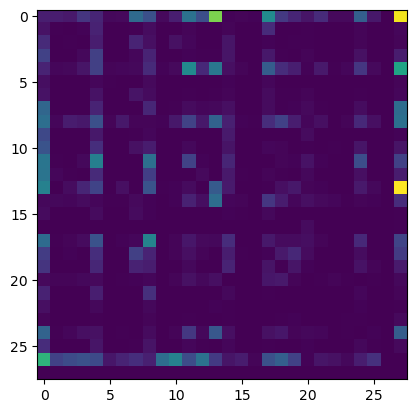

In [15]:
plt.imshow(N)

In [16]:
itos = {s:i for i,s in stoi.items()}
print(itos)
print(stoi)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


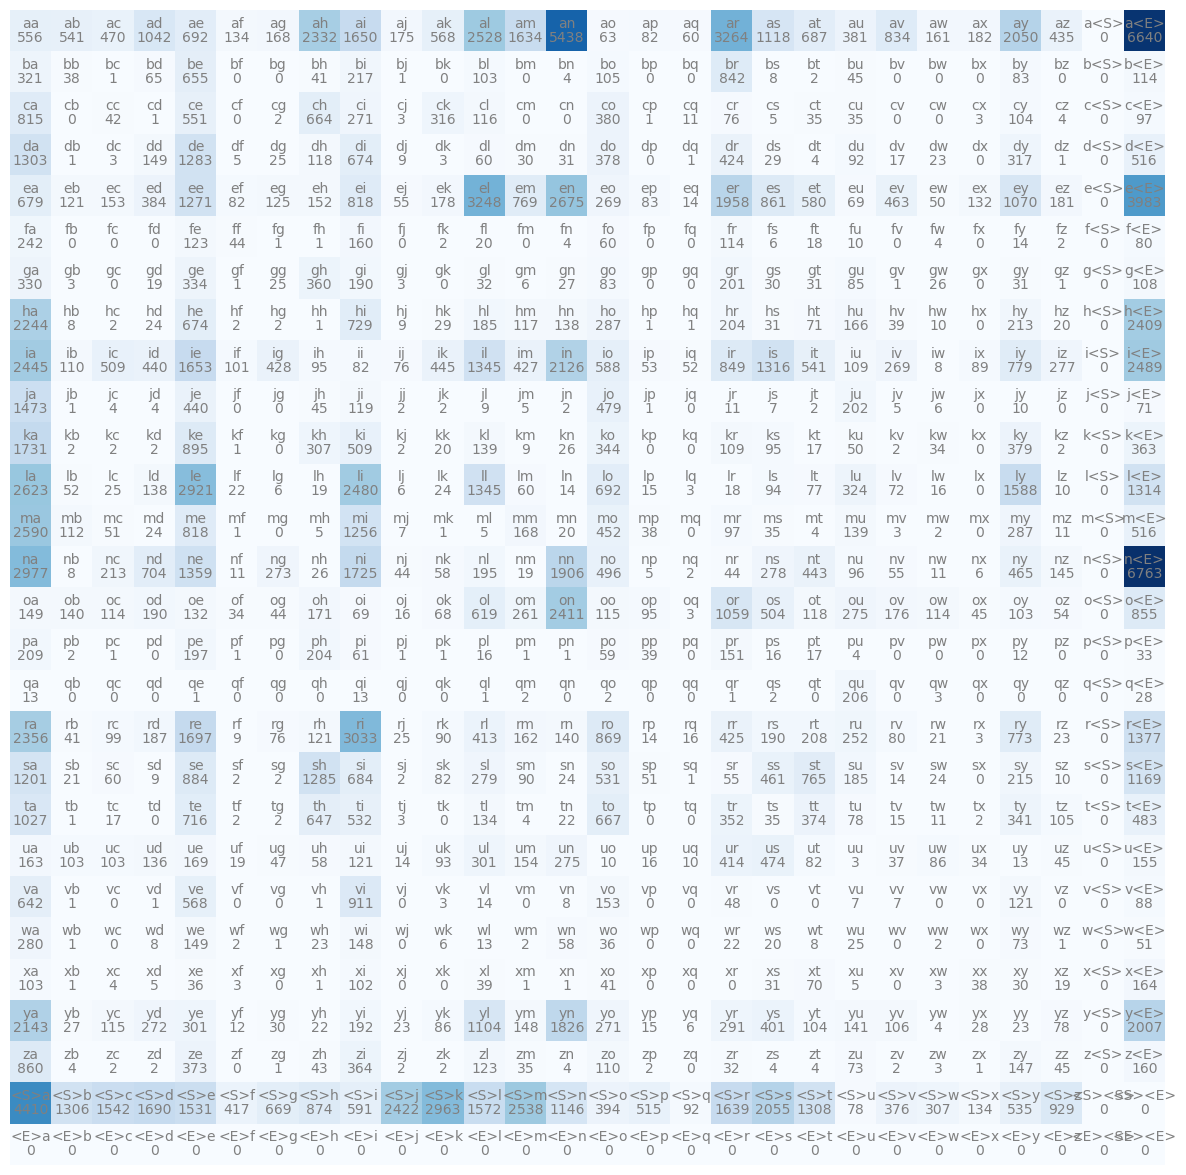

In [17]:
%matplotlib inline

plt.figure(figsize=(15,15))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        charstr = itos[i] + itos[j]
        plt.text(j,i, charstr, ha="center", va="bottom", color='gray')
        plt.text(j,i,N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [18]:
N_nv = torch.zeros((27,27), dtype=torch.int32)
chars_nv = sorted(list(set(''.join(words))))
stoi_nv = {a:b+1 for b,a in enumerate(chars_nv)}
stoi_nv['.'] = 0
stoi_nv

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [19]:
for w in words:
    wrd = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(wrd,wrd[1:]):
        ix1 = stoi_nv[ch1]
        ix2 = stoi_nv[ch2]
        N_nv[ix1,ix2] += 1

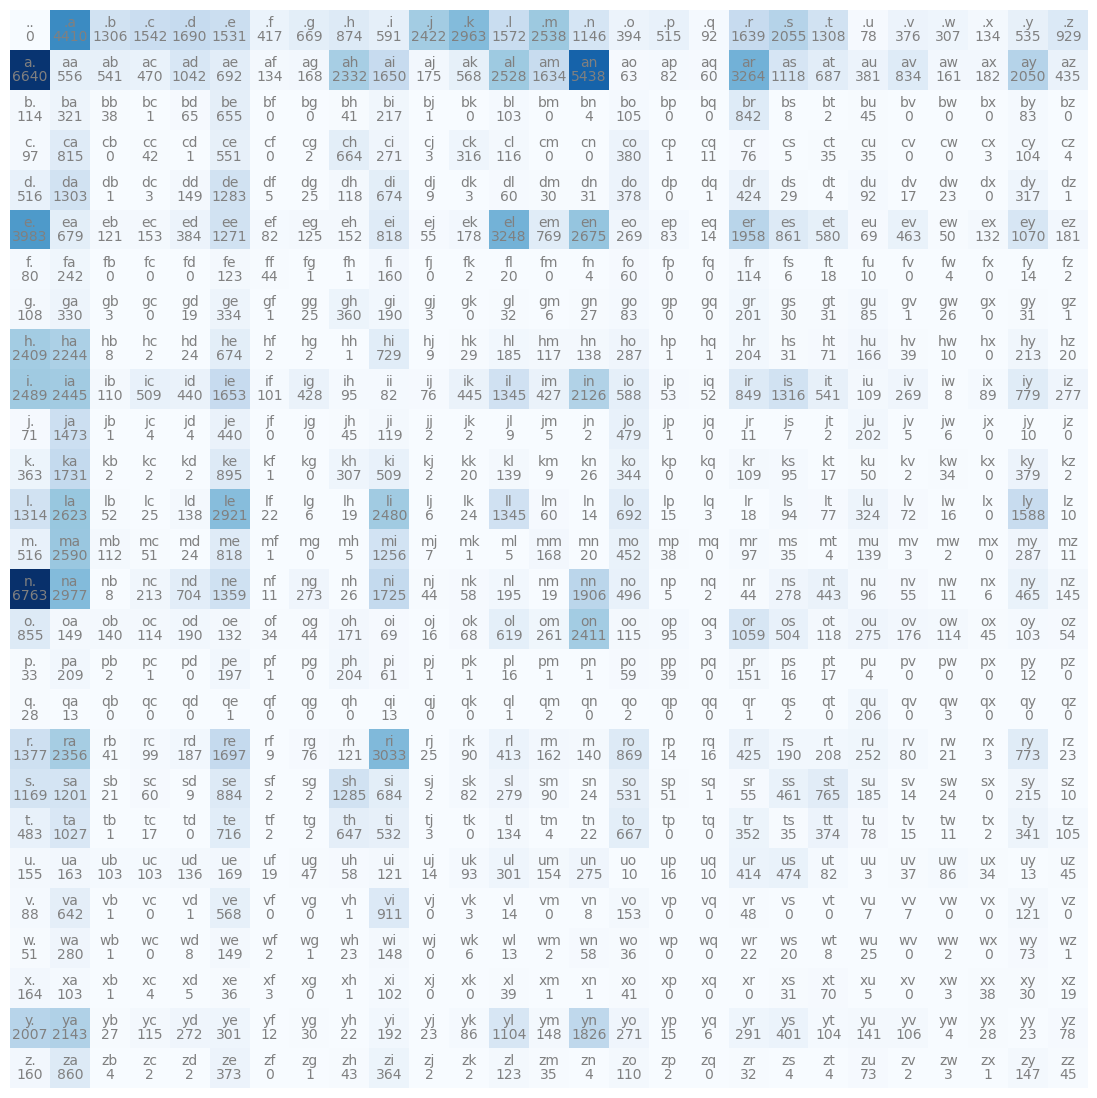

In [20]:
iots_nv = {b:a for a,b in stoi_nv.items()}
%matplotlib inline
plt.figure(figsize=(14,14))
plt.imshow(N_nv, cmap='Blues')
for i in range(27):
    for j in range(27):
        disp = iots_nv[i] + iots_nv[j]
        plt.text(j,i, disp, ha="center", va="bottom", color='gray')
        plt.text(j,i,N_nv[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

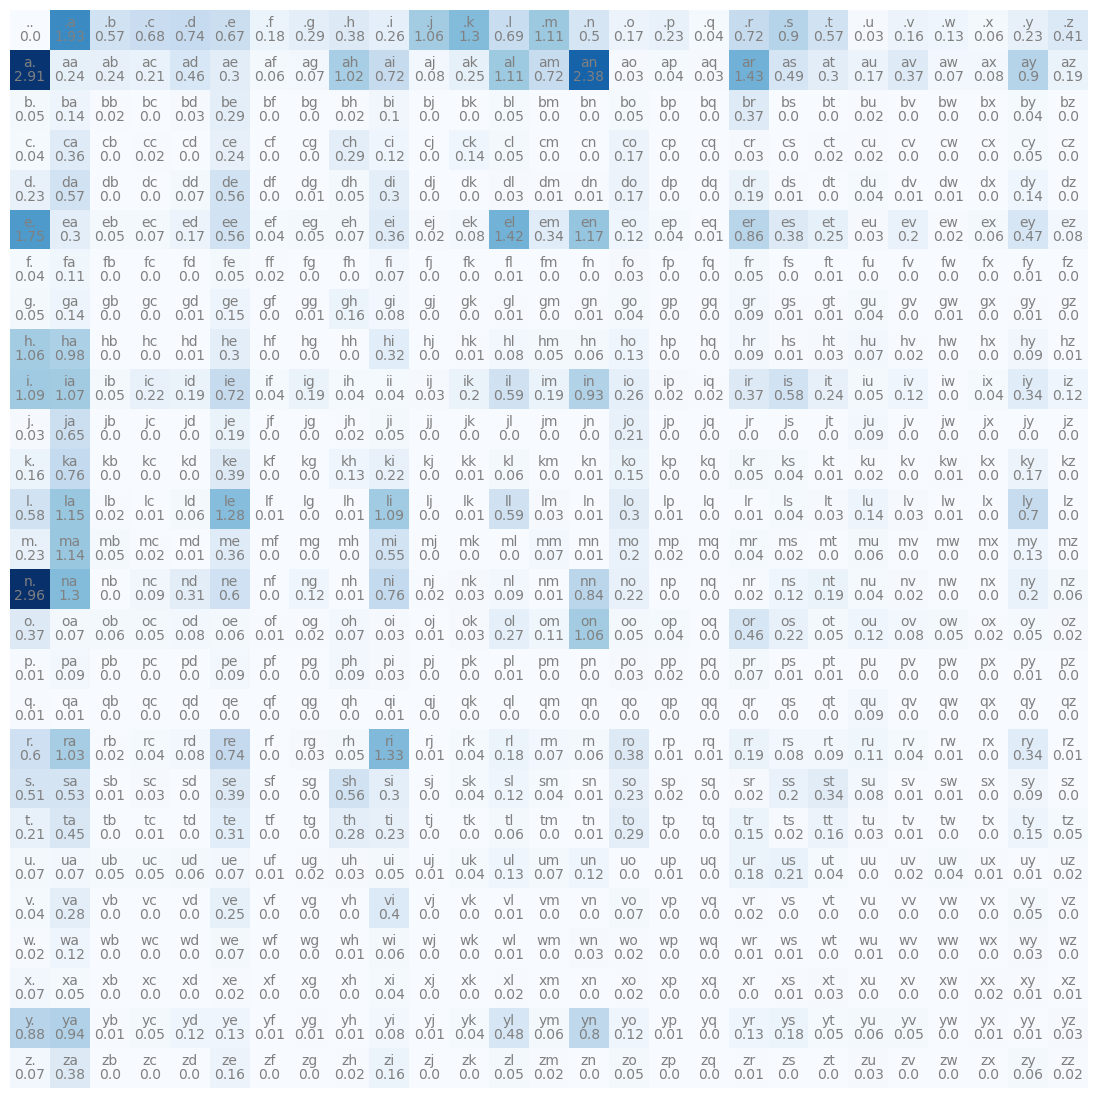

In [21]:
sum = float(torch.sum(N_nv).item())
%matplotlib inline
plt.figure(figsize=(14,14))
plt.imshow(N_nv, cmap='Blues')
for i in range(27):
    for j in range(27):
        disp = iots_nv[i] + iots_nv[j]
        plt.text(j,i, disp, ha="center", va="bottom", color='gray')
        plt.text(j,i,round((N_nv[i,j].item()/sum)*100,2), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [22]:
p = N_nv[1].float()
p = p/p.sum()
p

tensor([0.1960, 0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688,
        0.0487, 0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018,
        0.0963, 0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128])

In [23]:
p = torch.zeros((27,27))
for i in range(27):
    for j in range(27):
        p[i,j] = (N_nv[i,j]/(N_nv[i].float().sum().item())).item()
torch.multinomial(p,1)

weights = torch.tensor([0.1,0,0,0,0.2], dtype=torch.float32)
torch.multinomial(weights,2)

tensor([0, 4])

Ended at 24:16. Need to continue with probability

In [24]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p # You keep getting the same outcome everytime you run the cell because you use a generator object with a seed

tensor([0.7081, 0.3542, 0.1054])

In [25]:
# help(torch.Generator()) HELP FUNCTION EXISTS

In [26]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p/p.sum()

In [27]:
torch.multinomial(p, num_samples=20,replacement=True, generator=g) #torch.multinomial returns the indices of the input tensor that were sampled; replace = True means the same index can be selected multiple times.

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

So can I understand it like this. If I want to independently sample an outcome based on multiple probabilities, I use multinomial? YES

In [28]:
g = torch.Generator().manual_seed(2147483647)
p = N_nv[0].float()
p = p/p.sum()
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
iots_nv[ix]
stoi_nv[iots_nv[ix]]


10

In [29]:
ix = 0
name = ""
while True:
    p = N_nv[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p,num_samples=1,replacement=True).item()
    name += iots_nv[ix]
    ix = stoi_nv[iots_nv[ix]]
    if name.endswith('.'):
        break
print(name)

lis.


In [55]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    ix = 0
    out = []
    while True:
        p = N_nv[ix].float()
        p /= p.sum()
        # p = torch.ones([27])/27.0 #Completely untrained model would be like this
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(iots_nv[ix])
        if ix == 0:
            break
    print(''.join(out))    
# You don't need to use the i in the for loop, you can loop through that amount of times...

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [ ]:
 #basically made a uniform probability tensor... Each entry is equally likely.
torch.rand(27) #This gives 27 numbers from 0-1 with the chance of each instance having equal probability


tensor([0.2190, 0.3863, 0.0825, 0.4227, 0.7762, 0.8224, 0.3674, 0.3430, 0.5496,
        0.7327, 0.0999, 0.8416, 0.6272, 0.9808, 0.6065, 0.0735, 0.3892, 0.9953,
        0.6285, 0.7145, 0.1794, 0.3128, 0.7552, 0.2194, 0.0504, 0.4287, 0.1228])

In [83]:
g = torch.Generator().manual_seed(20)
P = N_nv.float()
test = torch.randperm(20,generator=g).reshape(4,5)
print(test)
torch.sum(test,0,keepdim=True) # Second argument tells the dimenison you want to sum, and if you say keepdim is Flase, you squeeze out the sum out of the tensor...

tensor([[11, 14,  5, 17, 16],
        [10, 15, 19,  0,  6],
        [ 3,  7, 12,  2,  4],
        [ 1, 18,  9,  8, 13]])


tensor([[25, 54, 45, 27, 39]])

In [92]:
sums = torch.sum(P,1, keepdim=True) #If you keepdim then you will see the shape it has after suming which is useful. Like here summing over dim 1 is going along dimension 1 which are the columns and then summing the entire row. Meaning that keep dim will give you a 27,1 tensor in this case.

In [97]:
#27,27
# 27,1
# So if I understand correctly, if we have a 3,4,2 which is like 3 sheets of 4x2 and a 4,1 then the 4,1 will be cast to 1,4,1 where it will copy the entries of original 4 rows into a new column so basically you will have the original data copied to the second column and now have 4,2, and then you will copy that into 3 sheets, at which point you can add/subtract... each entry by each entry?

In [96]:
P = P/sums

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)